In [8]:
import sim
import time
import cv2
import numpy as np
from PIL import Image
from queue import PriorityQueue
import math
from numpy import sqrt
import itertools
import sys
sys.setrecursionlimit(10000)

In [9]:
def resize(img,resolution):
    scale_percent = 500 # percent of original size
    width = int(resolution[1] * scale_percent / 100)
    height = int(resolution[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized
def x_w_i(w_x):
    y=((w_x+2.5)*1280)/5
    return round(y)
def y_w_i(w_y):
    x=((2.5-w_y)*1280)/5
    return round(x)
def x_i_w(i_x):
    y=(i_x*5/1280)-2.5
    return y
def y_i_w(i_y):
    x=(2.5)-(i_y*5/1280)
    return x
def draw_rec_red(x,image):
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(255,0,0)
                    
                    
def draw_rec_red_c(x,y,image):
    for i in range(10):
         for j in range(10):
                if (0<x-5+i<1280 and 0<y-5+j<1280):
                    image[x-5+i][y-5+j]=(255,0,0)
def draw_rec_green_c(x,y,image):
    for i in range(10):
         for j in range(10):
                if (0<x-5+i<1280 and 0<y-5+j<1280):
                    image[x-5+i][y-5+j]=(0,255,0)

def draw_rec_blue(x,image): 
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(0,0,255)
                    
                    
def draw_rec_green(x,image):
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(0,255,0)
                    
def draw_rec_black(a,b,img):
    for i in range(256):
         for j in range(256):
                if (0<a-128+i<1280 and 0<b-128+j<1280):
                    img[a-128+i][b-128+j]=0
def draw_rec_black_c(a,b,img):
    for i in range(128):
         for j in range(128):
                if (0<a-64+i<1280 and 0<b-64+j<1280):
                    img[a-64+i][b-64+j]=0
                    
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

def obstacles_grid(img):
    # getting the walls 
    mask_wall = cv2.inRange(img, np.array([228,228,253]),np.array([230,230,2256]))
    # getting the rims
    mask_rim = cv2.inRange(img, 0, 0)
    mask_total = cv2.bitwise_or(mask_wall,mask_rim,mask_rim)
    mask_total = cv2.bitwise_not(mask_total)
    return mask_total


def dist(x,y):
    dist = sqrt( (x[0] - y[0])**2 + (x[1] - y[1])**2 )
    return round(dist)



def get(array):
    array.sort()
    return array.pop(0)
    

def put(array,data):
    array.append(data)
    array.sort()
    return array

def expand(s):
    aa=[]
    for row in s:
        for a_a in row:
            aa.append(a_a)
    return aa
def man_dis(x,y):
    x1,y1=x
    x2,y2=y
    return abs(x1-x2)+abs(y1-y2)

def conv(s):
    g=round((s/128)-0.5)
    return g
def incov(s):
    g=(s+0.5)*128
    return g


     

In [10]:
sim.simxFinish(-1)
scale_percent =600
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)
thistime = time.time()
if clientID != -1:
    res_ro, robot = sim.simxGetObjectHandle(clientID, 'Pioneer_p3dx', sim.simx_opmode_oneshot_wait)
    res_l,right_motor_handle = sim.simxGetObjectHandle(clientID,'Pioneer_p3dx_rightMotor',sim.simx_opmode_oneshot_wait)
    res_r,left_motor_handle = sim.simxGetObjectHandle(clientID,'Pioneer_p3dx_leftMotor',sim.simx_opmode_oneshot_wait)
    res_floor,floor=sim.simxGetObjectHandle(clientID,'ResizableFloor_5_25',sim.simx_opmode_blocking)
    res,camera = sim.simxGetObjectHandle(clientID, 'ss', sim.simx_opmode_oneshot_wait)
    err, resolution, image = sim.simxGetVisionSensorImage(clientID, camera, 0, sim.simx_opmode_streaming)
    while (sim.simxGetConnectionId(clientID) != -1):
        res_pos,pos=sim.simxGetObjectPosition(clientID,robot,-1,sim.simx_opmode_oneshot_wait)
        res_or,orien=sim.simxGetObjectOrientation(clientID,robot,-1,sim.simx_opmode_oneshot_wait)
        print(pos)
        #print(orien)
        err, resolution, image = sim.simxGetVisionSensorImage(clientID, camera, 0, sim.simx_opmode_buffer)
        if err == sim.simx_return_ok:
            img = np.array(image, dtype=np.uint8)
            img.resize([resolution[0], resolution[1], 3]) 
            resized=resize(img,resolution)
            image = Image.fromarray(resized, 'RGB')
        sim.simxFinish(clientID)
img_obs = obstacles_grid(resized)
img_obsc=img_obs.copy()
xs=x_w_i(pos[0])
ys=y_w_i(pos[1])
start=[xs,ys]
goal=[x_w_i(-2.25),y_w_i(2.25)]


[2.2409071922302246, -2.2535393238067627, 0.13864584267139435]


In [11]:
#set a configuration space
for i in range(64,1280,128):
    for j in range(64,1280,128):
        if img_obs[i][j]==0:
            draw_rec_black(i,j,img_obsc)

for i in range(20,1280,20):
    for j in range(20,1280,20):
        if (i==20 or i==1260 or j==20 or j==1260):
            draw_rec_black_c(i,j,img_obsc)

In [12]:
def nearest(point1,openl):
    d=np.inf
    s=[]
    for i in range(len(openl)):
        if dist(point1,openl[i])<d:
            d=dist(point1,openl[i])
            s=openl[i]
    return s
def new_node(x_sam,x_nearest,img_obsc):
    step=50
    a=dist(x_sam,x_nearest)
    t=step/a
    if 0<t<1:
        x_a=int(((1-t)*x_nearest[0])+(t*x_sam[0]))
        y_a=int(((1-t)*x_nearest[1])+(t*x_sam[1]))
        if (0<x_a<1280) and (0<y_a<1280):
            sss=[x_a,y_a]
            return sss

In [13]:
def RRT(start,goal,img_obsc,resized):
    size=0
    openl=[]
    openl.append(start)
    while(size<10000):
        cd=np.random.uniform(0, 1279, size=(1,2))
        x_sam=[int(cd[0][0]),int(cd[0][1])]
        x_nearest=nearest(x_sam,openl)  
        x_new=new_node(x_sam,x_nearest,img_obsc)
        if x_new!=None:
            if img_obsc[x_new[0]][x_new[1]]!=0:
                if(goal[0]-50<x_new[0]<goal[0]+50 and goal[1]-50<x_new[1]<goal[1]+50):
                    draw_rec_green_c(x_new[0],x_new[1],resized)
                    cv2.line(resized, (x_nearest[1],x_nearest[0]),(x_new[1],x_new[0]),[255,0,0],2)
                    break
                else:
                    openl.append(x_new)
                    draw_rec_red_c(x_nearest[0],x_nearest[1],resized)
                    draw_rec_red_c(x_new[0],x_new[1],resized)
                    cv2.line(resized, (x_nearest[1],x_nearest[0]),(x_new[1],x_new[0]),[255,0,0],2)
        size=size+1
RRT(start,goal,img_obsc,resized)

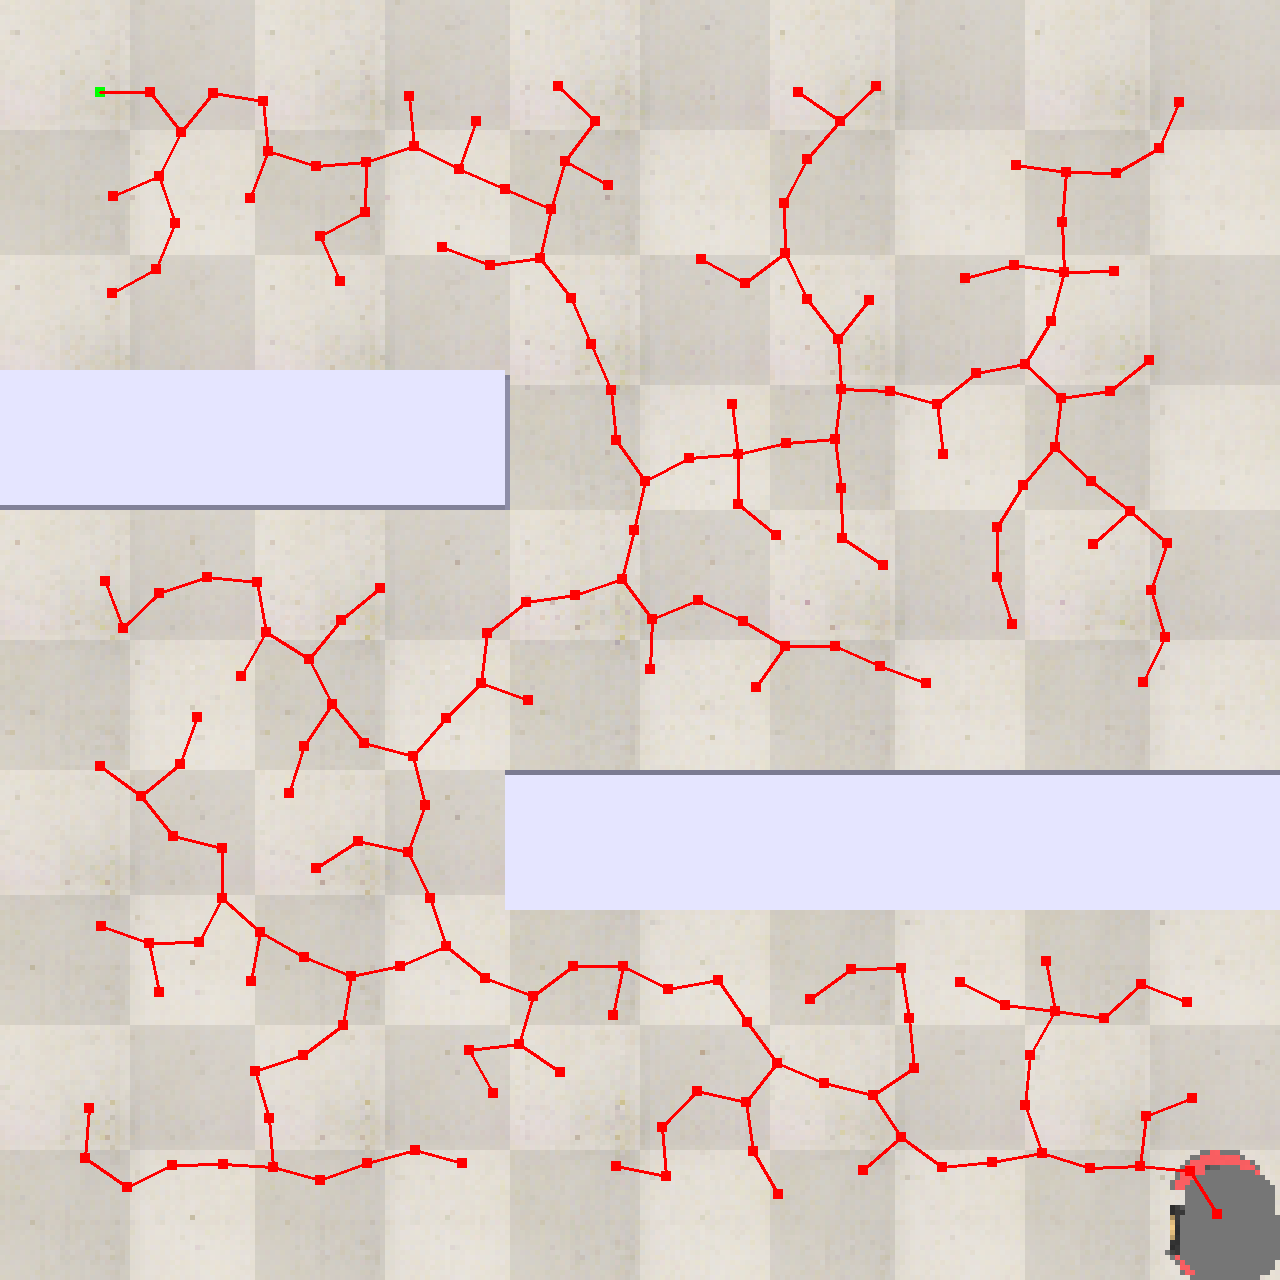

In [14]:
image_p= Image.fromarray(resized)
image_p